# Обучение нейрона с помощью функции потерь LogLoss

Последовательный график иллюстрирует обучение двухуровневой нейросети с вычислением условия смещения в зависимости от веса Wi и смещения bi где i — уровень слоя

- сеть прямого распространения 
- сеть обратного распространения

В каждом нейроне скрытого или выходного слоя обработка происходит в два этапа:


1.   Предварительная активация

это взвешанная сумма входов, то есть линейное преобразование весов по отношению к доступным входам - основа принятия решения нейроном 

2.   Активация

Существует четыре часто используемых и популярных функции активации - сигмовидная, гиперболический тангенс (tanh), ReLU (rectified linear - полулинейная функция) и Softmax (нормализованная экспонентная функция - гладкая аппроксимация к максимальому аргументу).

В этой части лабораторной работы используется сигмовидная функция активации. 



1.   инициализация сети
2.   обучение на тестовой выборке

    
    Процесс обучения нейрона:
    1. Входные данные корректируем по их весам и передаем по специальной формуле для расчета выхода нейрона.
    2. Вычисляем ошибку, которая является разницей между выходом нейрона и желаемым выходом в примере обучающего набора.
    3. В зависимости от направления ошибки слегка отрегулируем вес.
    4. Повторяем этот процесс некоторое количество эпох

На каждой итерации мы обрабатываем всю тренировочную выборку одновременно.

    
    Расчет формулы выхода нейрона происходит в несколько этапов:
    1. Вычисляется взвешенная сумма входов нейрона
    2. Нормализуется, чтобы значение было между 0 и 1.
Нормализация значения происходит с помощью сигмовидной функции - самая удобная. При этом для простоты можно не использовать пороговый потенциал.

В конце концов вес нейрона достигнет оптимального значения для тренировочного набора. Если мы позволим нейрону «подумать» в новой ситуации, которая сходна с той, что была в обучении, он должен сделать хороший прогноз.


<h3 style="text-align: center;"><b>Нейрон с сигмоидой</b></h3>

Снова рассмотрим нейрон с сигмоидой, то есть $$f(x) = \sigma(x)=\frac{1}{1+e^{-x}}$$ 

Ранее мы установили, что **обучение нейрона с сигмоидой с квадратичной функцией потерь**:  

$$MSE(w, x) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (\sigma(w \cdot x_i) - y_i)^2$$    

где $w \cdot x_i$ - скалярное произведение, а $\sigma(w \cdot x_i) =\frac{1}{1+e^{-w \cdot x_i}} $ - сигмоида -- **неэффективно**, то есть мы увидели, что даже за большое количество итераций нейрон предсказывает плохо.

Давайте ещё раз взглянем на формулу для градиентного спуска от функции потерь $MSE$ по весам нейрона:

$$ \frac{\partial MSE}{\partial w} = \frac{1}{n} X^T (\sigma(w \cdot X) - y)\sigma(w \cdot X)(1 - \sigma(w \cdot X))$$

А теперь смотрим на график сигмоиды:

<img src="https://cdn-images-1.medium.com/max/1200/1*IDAnCFoeXqWL7F4u9MJMtA.png" width=500px height=350px>

**Её значения: числа от 0 до 1.**

Если получше проанализировать формулу, то теперь можно заметить, что, поскольку сигмоида принимает значения между 0 и 1 (а значит (1-$\sigma$) тоже принимает значения от 0 до 1), то мы умножаем $X^T$ на столбец $(\sigma(w \cdot X) - y)$ из чисел от -1 до 1, а потом ещё на столбцы $\sigma(w \cdot X)$ и $(1 - \sigma(w \cdot X))$ из чисел от 0 до 1. Таким образом в лучшем случае $\frac{\partial{Loss}}{\partial{w}}$ будет столбцом из чисел, порядок которых максимум 0.01 (в среднем, понятно, что если сигмоида выдаёт все 0, то будет 0, если все 1, то тоже 0). После этого мы умножаем на шаг градиентного спуска, который обычно порядка 0.001 или 0.1 максимум. То есть мы вычитаем из весов числа порядка ~0.0001. Медленновато спускаемся, не правда ли? Это называют **проблемой затухающих градиентов**.

Чтобы избежать эту проблему в задачах классификации, в которых моделью является нейрон с сигмоидной функцией активации, предсказывающий "вероятности" принадлженостей к классамиспользуют **LogLoss**:  

$$J(\hat{y}, y) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\sigma(w \cdot x_i)) + (1 - y_i) \log(1 - \sigma(w \cdot x_i))$$

где, как и прежде, $y$ - столбец $(n, 1)$ из истинных значений классов, а $\hat{y}$ - столбец $(n, 1)$ из предсказаний нейрона.

# Код (импорт библиотек, инициализация функций потерь, код класса)

In [2]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [3]:
def loss(y_pred, y):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def mse_loss(y_pred, y):
  y_pred = y_pred.reshape(-1,1)
  y = np.array(y).reshape(-1,1)
  # return 0.5* np.mean((y_pred.reshape(-1,1) - y.reshape(-1,1))**2)
  return 0.5 * np.mean((y_pred - y)**2)

def log_loss_error(y_pred, y):
  return -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)

def cross_entropy_loss_error(y_pred, y):
  # return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
  return np.mean(log_loss_error(y_pred, y))

Отметим, что сейчас речь идёт именно о **бинарной классификации (на два класса)**, в многоклассовой классификации используется функция потерь под названием *кросс-энтропия*, которая является обобщением LogLoss'а на случай нескольких классов.

Почему же теперь всё будет лучше? Раньше была проблема умножения маленьких чисел в градиенте. Давайте посмотрим, что теперь:

* Для веса $w_j$:

$$ \frac{\partial Loss}{\partial w_j} = 
-\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i}{\sigma(w \cdot x_i)} - \frac{1 - y_i}{1 - \sigma(w \cdot x_i)}\right)(\sigma(w \cdot x_i))_{w_j}' = -\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i}{\sigma(w \cdot x_i)} - \frac{1 - y_i}{1 - \sigma(w \cdot x_i)}\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{ij} = $$
$$-\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{ij}$$

* Градиент $Loss$'а по вектору весов -- это вектор, $j$-ая компонента которого равна $\frac{\partial Loss}{\partial w_j}$ (помним, что весов всего $m$):

$$\begin{align}
    \frac{\partial Loss}{\partial w} &= \begin{bmatrix}
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i1} \\
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i2} \\
           \vdots \\
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{im}
         \end{bmatrix}
\end{align}=\frac{1}{n} X^T \left(\hat{y} - y\right)$$

По аналогии с $w_j$ выведите формулу для свободного члена (bias'а) $b$ 

(*hint*: можно считать, что при нём есть признак $x_{i0}=1$ на всех $i$):

In [4]:
'''
<Вывод формулы здесь>
'''

'\n<Вывод формулы здесь>\n'

Получили новое правило для обновления $w$ и $b$. 

In [4]:
def sigmoid(x):
    """Сигмоидальная функция"""
    return 1 / (1 + np.exp(-x))

Реализуйте нейрон с функцией потерь LogLoss:

In [19]:
class Neuron:
    
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        # пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.b = b


    def get_parms(self):
      return self.w, self.b
        
        
    def activate(self, x):
        return sigmoid(x)
    

    def sigma(self, X):
      return self.activate(X @ self.w + self.b)

        
    def forward_pass(self, X):
        """
        Эта функция рассчитывает ответ нейрона при предъявлении набора объектов
        :param: X -- матрица объектов размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        # print('sigma: ', self.sigma(X))
        # return self.sigma(X)
        # print('forward_pass: ', self.activate(np.dot(X, self.w) + self.b))
        """
        y_pred = np.zeros((X.shape[0],1))
        y_pred = self.activate(np.dot(X, self.w.reshape(X.shape[1],1)) + self.b)
        return y_pred
        """
        y_pred = np.zeros((X.shape[0], 1))
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
        
    def forward_pass_another(self, X):
        a0 = np.zeros((X.shape[0], 1))
        a0 = self.activate(np.dot(X, self.w) + self.b)
        a1 = sigmoid(a0)
        return a1.reshape(-1, 1)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.1):
        """
        Обновляет значения весов нейрона в соответствие с этим объектом
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        # тут нужно обновить веса по формулам, написанным выше
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        sigma = self.activate(X @ self.w + self.b)
        self.w = self.w - learning_rate * (X.T @ (sigma - y)) / n
        self.b = self.b - learning_rate * np.mean(sigma - y)

    def backward_pass_another(self, X, y, y_pred, learning_rate=0.1):   
        y = np.array(y).reshape(-1, 1)   
        da1 = y.shape[0] * 2 * (y_pred - y)
        da1 = np.array(da1).reshape(-1, 1)   
        da0 = np.multiply(np.multiply(y_pred, (1 - y_pred)), da1)
        self.w = self.w - learning_rate * np.dot(X.T, da0)
        #self.b = self.b - learning_rate * np.copy(da0)
        self.b = self.b - learning_rate * np.mean(da0 - y)
        return np.dot(da0, self.w.T)
        
    
    def fit(self, X, y, num_epochs=5000):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: J_values -- вектор значений функции потерь
        """
        self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
        self.b = 0  # смещение
        loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            # предсказания с текущими весами
            y_pred = self.forward_pass(X)
            # считаем функцию потерь с текущими весами
            loss_values.append(loss(y_pred, y))
            # обновляем веса по формуле градиентного спуска
            dx = self.backward_pass(X, y, y_pred)

        return loss_values

    def fit_another(self, X, y, num_epochs=5000):
        self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
        self.b = 0  # смещение
        loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            # предсказания с текущими весами
            y_pred = self.forward_pass_another(X)
            # считаем функцию потерь с текущими весами
            loss_values.append(cross_entropy_loss_error(y_pred, y))
            # обновляем веса по формуле градиентного спуска
            dx = self.backward_pass_another(X, y, y_pred)
        
        #print(x, dx, y, y_pred)

        return loss_values

Другой вариант - another - выполнен ради интереса для тренирвоки и проверки работы с разными структурами нейронных сетей. Этот вариант отличается пордком инициализации функции, иным порядком примменения сигмоидой функции. Следовало бы разделить класс и методы нейрона на три класса по соответствию 3м типам генераторов сигнала: сенсорный ассоциативный и реагирующий.

# Простейшее тестирование

Протестируем нейрон, обученный с новой функцией потерь, на тех же данных, что и в предыдущем ноутбуке:

**Проверка forward_pass()**

In [ ]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

In [ ]:
neuron = Neuron(w, b)

In [ ]:
y_pred_1 = sigmoid(neuron.forward_pass(X))
y_pred_1

forward_pass:  [[0.99987661]
 [0.99999386]
 [0.00449627]]


array([[0.73103432],
       [0.73105737],
       [0.50112407]])

In [ ]:
y_pred = neuron.forward_pass(X)
y_pred_2 = neuron.forward_pass_another(X)
print ("y_pred = " + str(y_pred))
print ("y_pred_2 = " + str(y_pred_2))

forward_pass:  [[0.99987661]
 [0.99999386]
 [0.00449627]]
y_pred = [[0.99987661]
 [0.99999386]
 [0.00449627]]
y_pred_2 = [[0.73103432]
 [0.73105737]
 [0.50112407]]


**Проверка backward_pass()**

In [ ]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [ ]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))
print ("b = " + str(neuron.b))

neuron.backward_pass_another(X, y, y_pred)
print ("w2 = " + str(neuron.w))
print ("b2 = " + str(neuron.b))

w = [[0.9001544 ]
 [1.76049276]]
b = 1.9998544421863216
w2 = [[0.89747348]
 [1.75192265]]
b2 = 2.067411069301046


# Тестирование на данных 

**Проверьте на наборах данных "яблоки и груши" и "голос".**

In [7]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1lV5-8eXE1RWBfg37ijWcsSoJ-7rxassi"}) 
downloaded.GetContentFile('apples_pears.csv')
apples_pears = pd.read_csv('apples_pears.csv', sep=',')

downloaded = drive.CreateFile({'id':"1HXZfEZjFUCKYO-jpd6SY6oBh0ag0dEuV"}) 
downloaded.GetContentFile('voice.csv')
voice = pd.read_csv('voice.csv', sep=',')

del(downloaded)

In [8]:
apples_pears

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0
...,...,...,...
995,0.288482,0.051186,0.0
996,0.892424,0.795257,0.0
997,0.927219,0.134986,1.0
998,0.015830,0.481322,0.0


In [9]:
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


# Тестирование на яблоки и груши: без деления выборки посмотрим на функцию потерь

In [10]:
apples_pears['symmetry']

0      0.257305
1      0.015915
2      0.304210
3      0.140899
4      0.193123
         ...   
995    0.051186
996    0.795257
997    0.134986
998    0.481322
999    0.308571
Name: symmetry, Length: 1000, dtype: float64

In [31]:
def plot_scatter(x1, x1_label, x2, x2_label, y, title):
  plt.figure(figsize=(15, 10))
  plt.scatter(x2, x1, c=y)
  plt.title(title)
  plt.xlabel(x1_label)
  plt.ylabel(x2_label)
  plt.show()

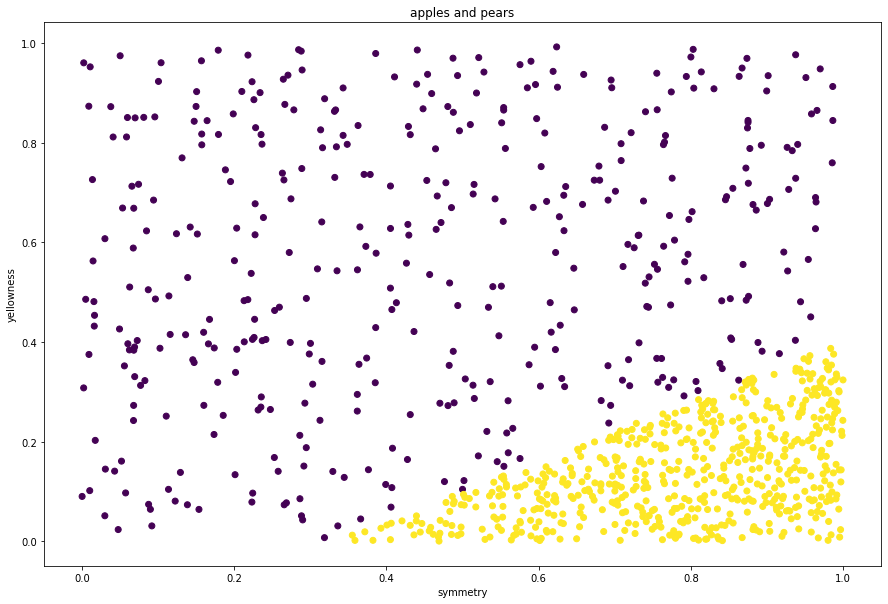

In [ ]:
plot_scatter(apples_pears['symmetry'], 'symmetry', 
             apples_pears['yellowness'], 'yellowness', 
             apples_pears['target'], 'apples and pears')

In [46]:
def plot(y, x_label, y_label, title):
  plt.figure(figsize=(15,10))
  plt.plot(y)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

In [ ]:
X = apples_pears[['yellowness', 'symmetry']].values
y = apples_pears[['target']].values.reshape((-1, 1))
neuron = Neuron()
loss = neuron.fit(X, y, num_epochs=10000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


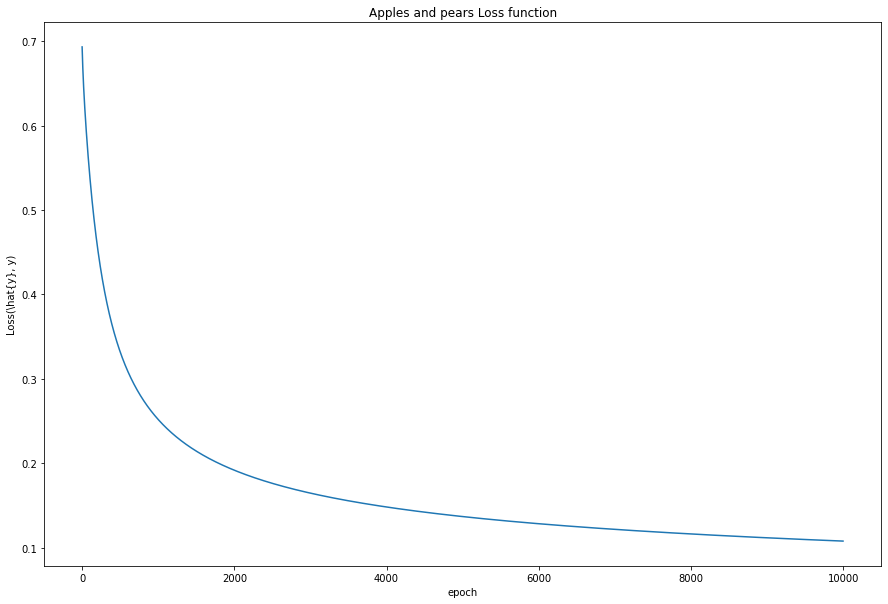

In [ ]:
plot(loss, 'epoch', 'Loss(\hat{y}, y)', 'Apples and pears Loss function')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


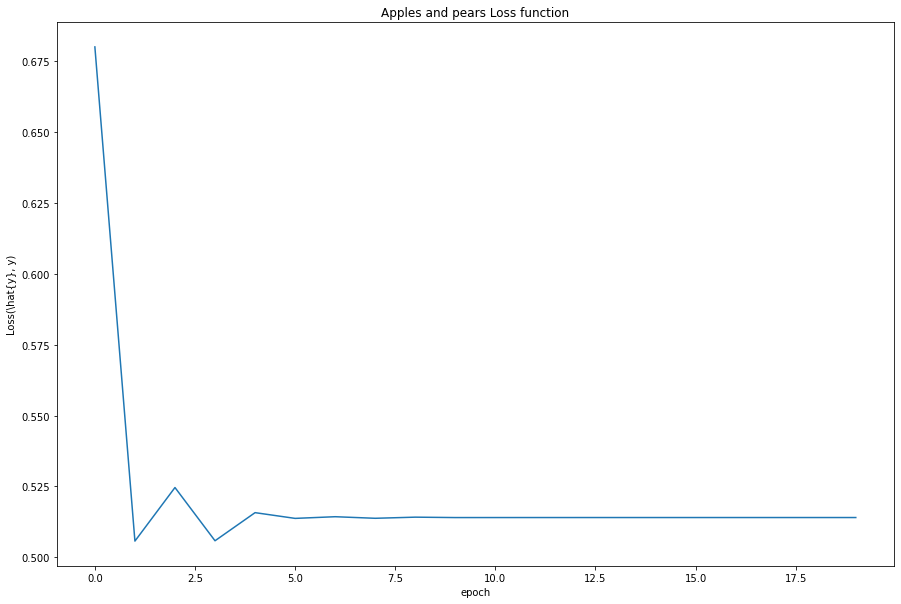

In [ ]:
loss_another = neuron.fit_another(X, y, num_epochs=20)
plot(loss_another, 'epoch', 'Loss(\hat{y}, y)', 'Apples and pears Loss function')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


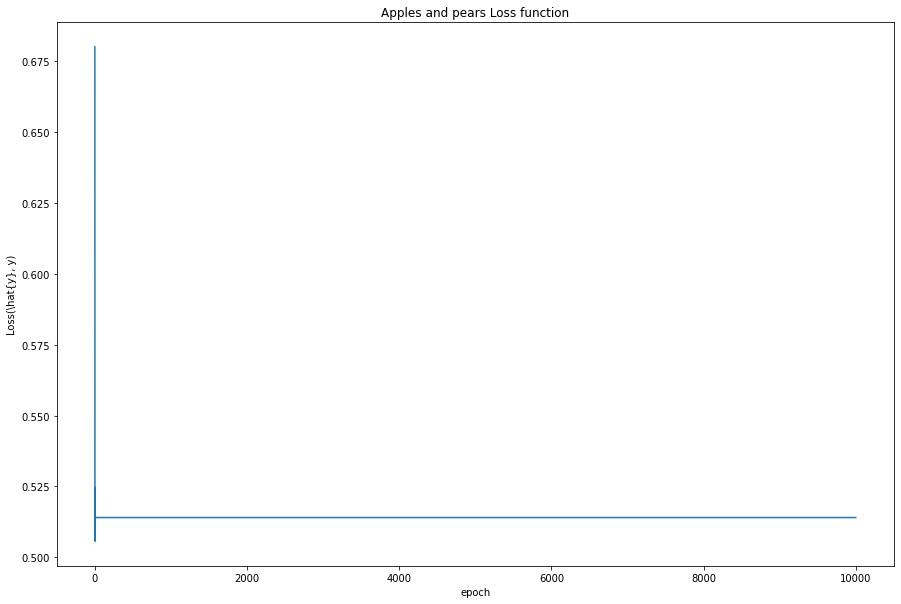

In [ ]:
loss_another = neuron.fit_another(X, y, num_epochs=10000)
plot(loss_another, 'epoch', 'Loss(\hat{y}, y)', 'Apples and pears Loss function')

In [ ]:
print(loss_another[2000])
print(loss_another[10000-1])
print('equal: ', loss_another[2000] == loss_another[10000-1])
print(loss_another[2000] - loss_another[10000-1], ' is a diff')

0.5139967576910657
0.5139967576910296
equal:  False
3.608224830031759e-14  is a diff


In [ ]:
print(loss[2000])
print(loss[10000-1])
print('equal: ', loss[2000] == loss[10000-1])
print(loss[2000] - loss[10000-1], ' is a diff')

0.19169117621076773
0.10772983261488525
equal:  False
0.08396134359588248  is a diff


# Тестрирование на голосе: разделим выборку

In [10]:
voice_data = voice.copy()

In [19]:
# можно перемешать датасет
# voice_data = voice_data.sample(frac=1)

# Преподготовка данных перед применением Нейрона

1. проверить наличие null и nan
2. заменим категориальные переменные
3. нужна ли нормализация или стандартизация? для этого нужно проверить распределение данных - нормально или нет узнать максимумы для нормализации или среднее для стандартизации

In [21]:
# проверим наличие пустых значений в колоке "label"
cut_list = [i 
            for i in range(len(voice_data.label)) 
            if pd.isnull(voice_data.label[i])]
print(cut_list)

[]


In [22]:
# покажет информацию о размерности данных 
# описание индекса, количество not-a-number элементов 
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Избавимся от категориальной переменной: произвольно присвоим числовое значение для каждой категории.

In [23]:
voice_data.label.unique()

array(['male', 'female'], dtype=object)

In [24]:
voice_data.label = pd.factorize(voice.label)[0]
voice.label[0], voice_data.label[0]

('male', 0)

Посмотрим статистику: исследуем диапазоны, среднее, отклонение, соотношения уникальных значений, 

In [25]:
# показывает статистики 
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


In [26]:
np.mean(voice_data)[np.mean(voice_data)>1]

skew        3.140168
kurt       36.568461
maxdom      5.047277
dfrange     4.994630
dtype: float64

In [27]:
# standard deviation
# возвращает стандартное отклонение, меру разброса распределения элементов массива
np.std(voice_data)[np.std(voice_data)>1]

skew         4.239859
kurt       134.907364
maxdom       3.520601
dfrange      3.519484
dtype: float64

In [28]:
voice_data.shape

(3168, 21)

In [29]:
# количество уникальных значений для каждого столбца 
df = pd.DataFrame(voice_data.nunique(), columns=['nunique'])
df['percent_from_whole'] = round(df['nunique']*100/voice_data.shape[0],3)
df

,nunique,percent_from_whole
meanfreq,3166,99.937
sd,3166,99.937
median,3077,97.128
Q25,3103,97.948
Q75,3034,95.770
IQR,3073,97.001
skew,3166,99.937
kurt,3166,99.937
sp.ent,3166,99.937
sfm,3166,99.937


Проверим взаимные корреляции. Некоторые признаки могут выражаться друг через друга. В этом случае нужно оставить только один. В случае прямой линейной зависимости смысла оставлять оба параметра из коррелирующей пары нет.

In [30]:
corr = pd.DataFrame(voice_data).corr().abs()
corr.style.background_gradient(cmap='YlGnBu')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,0.739039,0.925445,0.911416,0.740997,0.627605,0.322327,0.316036,0.601203,0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,0.216979,0.337415
sd,0.739039,1.000000,0.562603,0.846931,0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,0.529150,0.739039,0.466281,0.345609,0.129662,0.482726,0.357667,0.482278,0.475999,0.122660,0.479539
median,0.925445,0.562603,1.000000,0.774922,0.731849,0.477352,0.257407,0.243382,0.502005,0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,0.213298,0.283919
Q25,0.911416,0.846931,0.774922,1.000000,0.477140,0.874189,0.319475,0.350182,0.648126,0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,0.141377,0.511455
Q75,0.740997,0.161076,0.731849,0.477140,1.000000,0.009636,0.206339,0.148881,0.174905,0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,0.023750,0.335114,0.335648,0.216475,0.066906
IQR,0.627605,0.874660,0.477352,0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,0.403764,0.627605,0.534462,0.222680,0.069588,0.333362,0.357037,0.337877,0.331563,0.041252,0.618916
skew,0.322327,0.314597,0.257407,0.319475,0.206339,0.249497,1.000000,0.977020,0.195459,0.079694,0.434859,0.322327,0.167668,0.216954,0.080861,0.336848,0.061608,0.305651,0.304640,0.169325,0.036627
kurt,0.316036,0.346241,0.243382,0.350182,0.148881,0.316185,0.977020,1.000000,0.127644,0.109884,0.406722,0.316036,0.194560,0.203201,0.045667,0.303234,0.103313,0.274500,0.272729,0.205539,0.087195
sp.ent,0.601203,0.716620,0.502005,0.648126,0.174905,0.640813,0.195459,0.127644,1.000000,0.866411,0.325298,0.601203,0.513194,0.305826,0.120738,0.293562,0.294869,0.324253,0.319054,0.198074,0.490552
sfm,0.784332,0.838086,0.661690,0.766875,0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,0.485913,0.784332,0.421066,0.362100,0.192369,0.428442,0.289593,0.436649,0.431580,0.211477,0.357499


In [31]:
corr_triangle = np.tril(corr)
np.fill_diagonal(corr_triangle, 0)
corr_triangle = pd.DataFrame(
        corr_triangle,
        columns=voice_data.columns, 
        index=voice_data.columns)

corr_triangle.style.background_gradient(cmap='YlGnBu')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sd,0.739039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
median,0.925445,0.562603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q25,0.911416,0.846931,0.774922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q75,0.740997,0.161076,0.731849,0.477140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
IQR,0.627605,0.874660,0.477352,0.874189,0.009636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skew,0.322327,0.314597,0.257407,0.319475,0.206339,0.249497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kurt,0.316036,0.346241,0.243382,0.350182,0.148881,0.316185,0.977020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sp.ent,0.601203,0.716620,0.502005,0.648126,0.174905,0.640813,0.195459,0.127644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sfm,0.784332,0.838086,0.661690,0.766875,0.378198,0.663601,0.079694,0.109884,0.866411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Ставим порог по абсолютному значению взаимных корреляций 0.9. Обычно выставляют значение 0.999.

Сильно коррелирующие значения с целевым параметром удалять не нужно, здесь приведено для возможности изучить какие признаки вернее помогут кластеризовать данные. То есть следовало проводить отбосы по порогу по таблице корреляции без label.

In [32]:
# выберем колонки, хотя бы одно значение в которой превышает 0.9
to_drop = [column for column in corr_triangle.columns if any(corr_triangle[column] > 0.90)]
to_drop

['meanfreq', 'median', 'Q25', 'skew', 'maxdom']

In [33]:
voice_data.drop(to_drop, axis=1, inplace=True)

Проверим необходимость нормализации тестами.

не похоже на нормальное распределение

In [34]:
from scipy.stats import shapiro, normaltest

In [35]:
# normality test
stat, p = shapiro(voice_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.043, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [36]:
df = []
alpha = 0.05
for i in voice_data.columns:
  res = []
  stat, p = shapiro(voice_data[i])
  res.append(i)
  res.append('statistics=%.3f, p=%.3f' % (stat, p))
  if p > alpha:
    res.append('Sample looks Gaussian (fail to reject H0)')
  else:
    res.append('Sample does not look Gaussian (reject H0)')
  df.append(res)
df = pd.DataFrame(df, columns=['data_col', 'normal_shapiro_test_result', 'interpretation'])
df

,data_col,normal_shapiro_test_result,interpretation
0,sd,"statistics=0.969, p=0.000",Sample does not look Gaussian (reject H0)
1,Q75,"statistics=0.954, p=0.000",Sample does not look Gaussian (reject H0)
2,IQR,"statistics=0.943, p=0.000",Sample does not look Gaussian (reject H0)
3,kurt,"statistics=0.231, p=0.000",Sample does not look Gaussian (reject H0)
4,sp.ent,"statistics=0.977, p=0.000",Sample does not look Gaussian (reject H0)
5,sfm,"statistics=0.966, p=0.000",Sample does not look Gaussian (reject H0)
6,mode,"statistics=0.905, p=0.000",Sample does not look Gaussian (reject H0)
7,centroid,"statistics=0.976, p=0.000",Sample does not look Gaussian (reject H0)
8,meanfun,"statistics=0.982, p=0.000",Sample does not look Gaussian (reject H0)
9,minfun,"statistics=0.785, p=0.000",Sample does not look Gaussian (reject H0)


In [37]:
stat, p = normaltest(voice_data)
#p = [round(i,3) for i in p]
alpha = 0.05
normaltest_result = [
 'Sample looks Gaussian (fail to reject H0)'
 if i > alpha
 else
 'Sample does not look Gaussian (reject H0)'
 for i in p]

columns = voice_data.columns.values.tolist()

df = pd.DataFrame({'stat': stat, 'p': p}, 
                  columns=['data_col', 'stat', 'p', 'normal_test_result'])
df.data_col = voice_data.columns.values.tolist()
df.normal_test_result = normaltest_result
df

,data_col,stat,p,normal_test_result
0,sd,77.597941,1.411956e-17,Sample does not look Gaussian (reject H0)
1,Q75,547.249429,1.466548e-119,Sample does not look Gaussian (reject H0)
2,IQR,89.110200,4.466485e-20,Sample does not look Gaussian (reject H0)
3,kurt,3505.279959,0.000000e+00,Sample does not look Gaussian (reject H0)
4,sp.ent,129.136022,9.088016e-29,Sample does not look Gaussian (reject H0)
5,sfm,373.553646,7.653436e-82,Sample does not look Gaussian (reject H0)
6,mode,297.374792,2.666149e-65,Sample does not look Gaussian (reject H0)
7,centroid,218.335138,3.882641e-48,Sample does not look Gaussian (reject H0)
8,meanfun,354.612881,9.926389e-78,Sample does not look Gaussian (reject H0)
9,minfun,1459.168872,0.000000e+00,Sample does not look Gaussian (reject H0)


Продемонстрируем результат гистограммой.

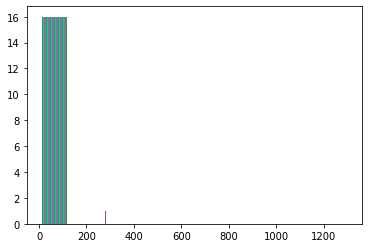

In [38]:
plt.hist(voice_data)
plt.show()

# Разделим и обучим выборку

In [39]:
X = voice_data.iloc[:, 0:len(voice_data.columns)-1]
Y = voice_data.iloc[:, -1]
Y

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.4273553 , -5.69360723, -0.21477826, ..., -0.70840431,
        -1.41913712, -1.45477229],
       [ 0.6116695 , -5.58898726, -0.25848536, ..., -0.70840431,
        -1.4058184 , -1.01410294],
       [ 1.60384791, -3.92869875,  0.90932569, ..., -0.70840431,
        -1.41691733, -1.06534356],
       ...,
       [ 2.32272355, -0.01712269,  2.49266553, ..., -0.70840431,
        -0.58671739,  0.17588664],
       [ 2.012196  , -0.20402146,  2.15365344, ..., -0.70840431,
        -0.40025537,  1.14916112],
       [ 2.14765111,  1.10267866,  2.25467137, ..., -0.70840431,
        -1.2637521 ,  1.47567886]])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

In [42]:
len(x_train), len(y_train)

(2217, 2217)

In [43]:
neuron = Neuron()
voice_loss = neuron.fit(x_train, y_train.values)

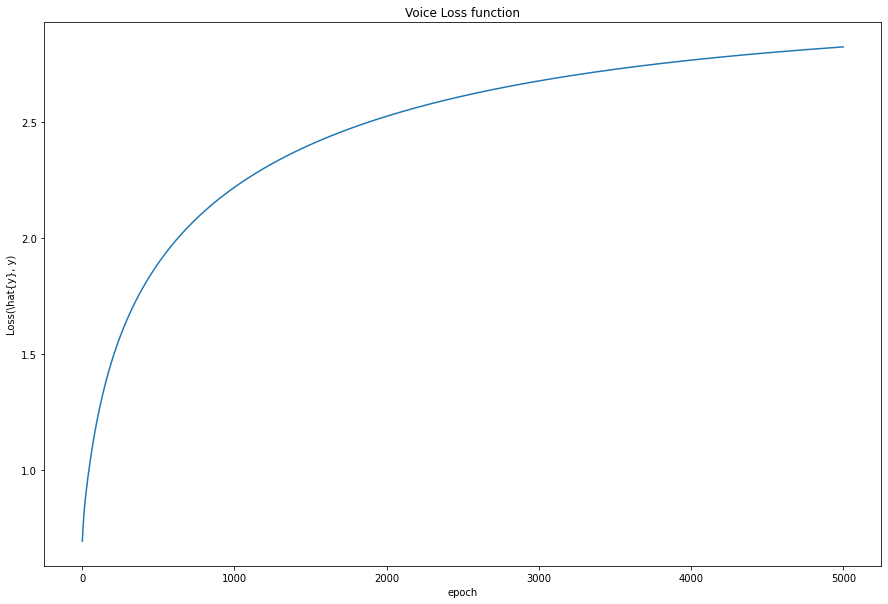

In [40]:
plot(voice_loss, 'epoch', 'Loss(\hat{y}, y)', 'Voice Loss function')

In [44]:
voice_loss_another = neuron.fit_another(x_train, y_train.values, num_epochs=5000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


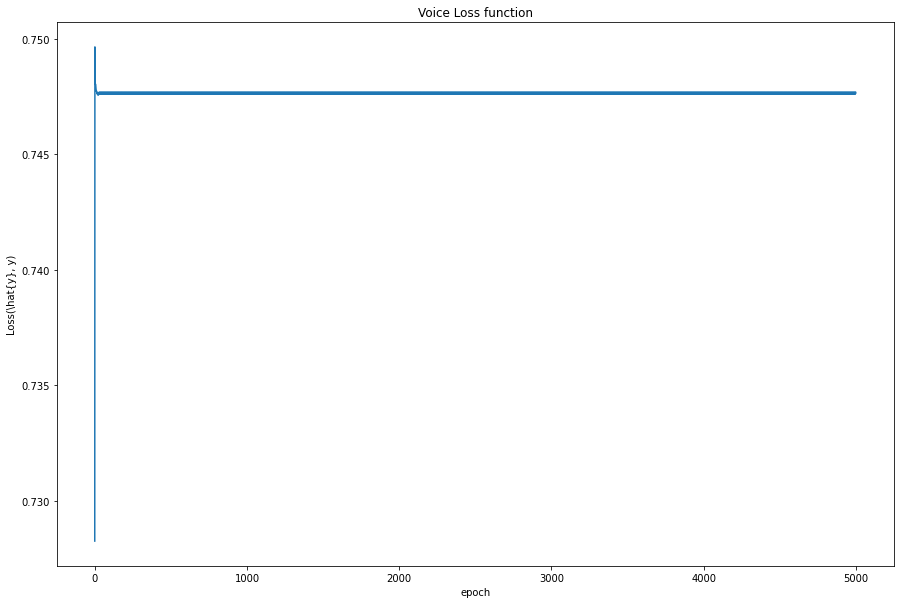

In [47]:
plot(voice_loss_another, 'epoch', 'Loss(\hat{y}, y)', 'Voice Loss function')

In [48]:
voice_loss_another = neuron.fit_another(x_train, y_train.values, num_epochs=500)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


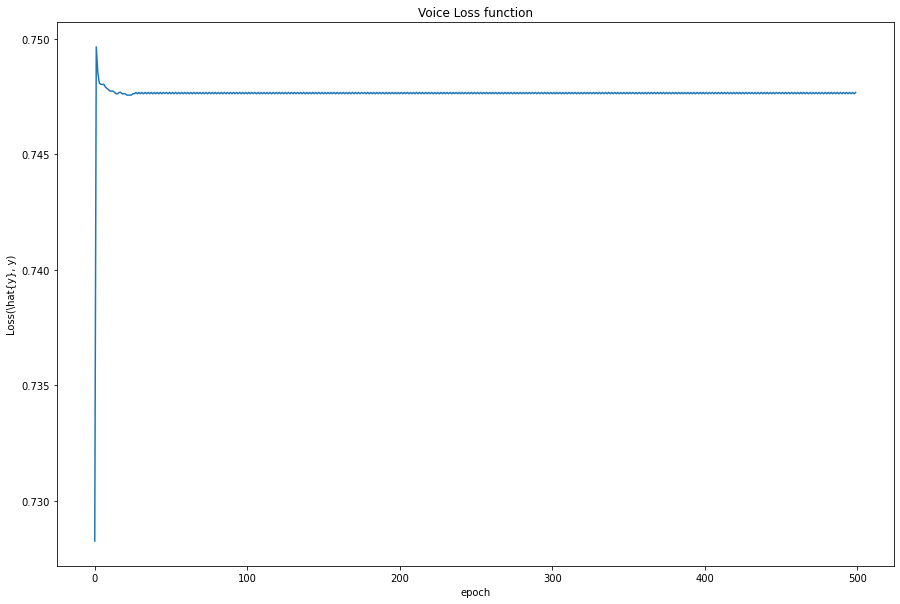

In [49]:
plot(voice_loss_another, 'epoch', 'Loss(\hat{y}, y)', 'Voice Loss function')

# Было неверно, но полезно

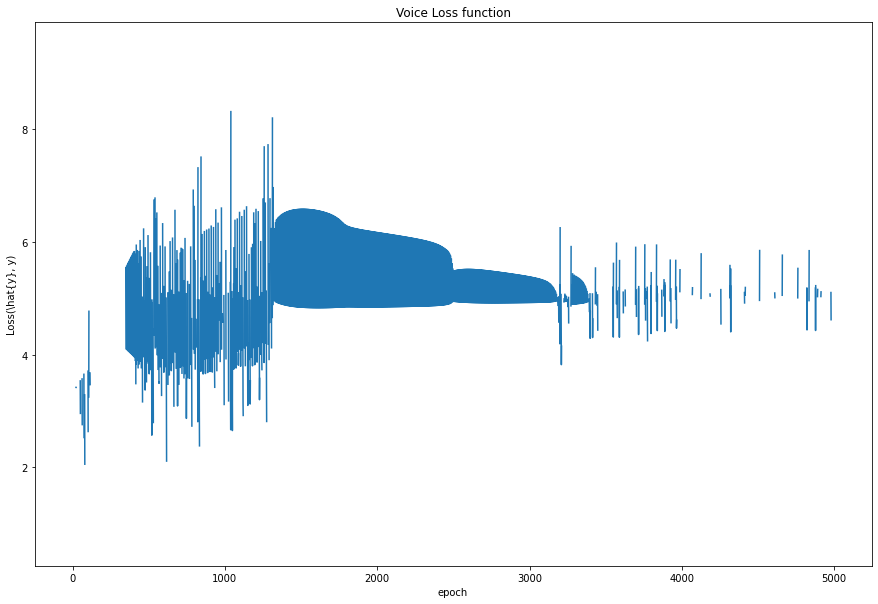

In [ ]:
plot(voice_loss, 'epoch', 'Loss(\hat{y}, y)', 'Voice Loss function')

In [ ]:
plot(voice_loss_another, 'epoch', 'Loss(\hat{y}, y)', 'Voice Loss function')

In [ ]:
y_pred = neuron.forward_pass(X_test)
y_pred_another = neuron.forward_pass_another(X_test).reshape(1, -1)[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
to_normalize = pd.DataFrame(np.tril(corr), index=corr.columns)
to_normalize = to_normalize[to_drop[0]>0.9].index.to_list()

In [ ]:
data = preprocessing.normalize(data)
standardized_X = preprocessing.scale(data)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, shuffle=True)
neuron = Neuron()
voice_loss = neuron.fit(X_train, y_train.values, num_epochs=3000)